# Explore harvested text files using TF-IDF

In [1]:
import os
import pandas as pd
import fileinput
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob
from operator import itemgetter
from pathlib import Path
import nltk
import numpy as np
import altair as alt

# Are you using Jupyter Lab?
# If so either don't run this cell or comment out the line below

# alt.renderers.enable('notebook')

# If you forget, run this cell, and then get strange warnings when you make a chart,
# uncomment the following line and run this cell to reset the chart renderer

# alt.renderers.enable('default')

#nltk.download('stopwords')
#nltk.download('punkt')
#stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
# Import a harvest zip file you've created previously
# First upload the zip file to the data directory, then run this cell
import zipfile
for zipped in sorted(Path('data').glob('*.zip')):
    print(f'Unzipping {zipped}...')
    with zipfile.ZipFile(zipped, 'r') as zip_file:
        zip_file.extractall(Path(f'data/{zipped.stem}'))

In [2]:
def get_latest_harvest():
    '''
    Get the timestamp of the most recent harvest.
    '''
    harvests = sorted([d for d in Path('data').iterdir() if d.is_dir() and not d.name.startswith('.')])
    try:
        harvest = harvests[-1]
    except IndexError:
        print('No harvests!')
        harvest = None
    return harvest

In [3]:
def get_docs(harvest):
    docs_path = get_docs_path(harvest)
    for p in docs_path:
        yield p.read_text(encoding='utf-8').strip()
        
def get_docs_path(harvest):
    path = Path(f'{harvest}/text')
    docs_path = [p for p in sorted(path.glob('*.txt'))]
    return docs_path

def get_file_names(harvest):
    return [p.stem for p in get_docs_path(harvest)]

def get_years(harvest):
    return list(set([int(d.stem[:4]) for d in get_docs_path(harvest)]))

def get_docs_year(harvest):
    path = Path(f'{harvest}/text')
    for year in get_years(harvest):
        docs_path = [p for p in sorted(path.glob(f'{year}*.txt'))]
        year_doc = ' '.join([p.read_text(encoding='utf-8').strip() for p in docs_path])
        yield year_doc

In [4]:
harvest = get_latest_harvest()

## By article

In [5]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1,1), min_df=5, max_df=0.5)
# preprocessor = lambda x: re.sub(r'(\d[\d\.])+', 'NUM', x.lower())
X_freq = np.asarray(vectorizer.fit_transform(get_docs(harvest)).todense())
df_freq = pd.DataFrame(X_freq, columns=vectorizer.get_feature_names(), index=get_file_names(harvest))

In [6]:
# The number of words you want to show
num_words = 20
top_words = pd.DataFrame({n: df_freq.T[col].nlargest(num_words).index.tolist() for n, col in enumerate(df_freq.T)}).T
top_words.index = get_file_names(harvest)
top_words.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
18601224-13-5696044,cases,packages,casks,case,bundles,bags,hardware,brothers,kegs,barrels,dec,bales,tons,hhds,boxes,22,portland,schooner,nails,agents
18620111-319-196391314,tons,agents,passengers,brig,ult,agent,mrs,otago,ship,barque,ballast,newcastle,captain,steerage,cabin,miss,castle,schooner,28th,rev
18630905-319-197290261,tons,agents,passengers,cabin,mrs,ballast,steerage,schooner,ship,miss,agent,brig,barque,bremen,brothers,messrs,september,june,white,wm
18640220-319-197293051,tho,despatch,hughes,gallons,county,annum,majesty,meeting,shock,melbourne,frederick,bo,author,wine,copy,act,sir,1863,deceased,appears
18641115-809-155019508,tho,defendant,plaintiff,aud,ho,committee,court,bryant,league,meeting,election,10s,case,having,wa3,held,yesterday,resolution,fitzroy,wero


## By year

In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1,1), min_df=5, max_df=0.5)
# preprocessor = lambda x: re.sub(r'(\d[\d\.])+', 'NUM', x.lower())
X_freq = np.asarray(vectorizer.fit_transform(get_docs_year(harvest)).todense())
df_tfidf_years = pd.DataFrame(X_freq, columns=vectorizer.get_feature_names(), index=get_years(harvest))

In [8]:
df_tfidf_years.head()

,00,000ft,001,002,003,005,01,010,011,01in,...,youthful,ys,zea,zeal,zeehan,zenith,zephyr,zone,zones,íb
1860,0.008031,0.011601,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1862,0.013601,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1863,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1864,0.012404,0.000000,0.0,0.013705,0.024394,0.041116,0.0,0.033405,0.004915,0.0,...,0.0,0.0,0.0,0.022965,0.0,0.0,0.0,0.0,0.0,0.0
1867,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Highest scores each year

In [9]:
# Top words per year
df_years_top = pd.DataFrame({n: df_tfidf_years.T[col].nlargest(10).index.tolist() for n, col in enumerate(df_tfidf_years.T)}).T
df_years_top.index = get_years(harvest)
df_years_top.head()

,0,1,2,3,4,5,6,7,8,9
1860,packages,casks,bundles,hardware,kegs,bags,barrels,brothers,hhds,dec
1862,agents,brig,ult,otago,newcastle,ballast,barque,tonb,cabin,steerage
1863,agents,cabin,ballast,steerage,schooner,brig,bremen,barque,brothers,wm
1864,colony,6d,majesty,lb,1s,10s,bearing,nov,circulation,bunches
1867,duke,lamps,edinburgh,prince,hume,deposited,stranger,proceeded,geelong,ye


## Visualise highest scores per year

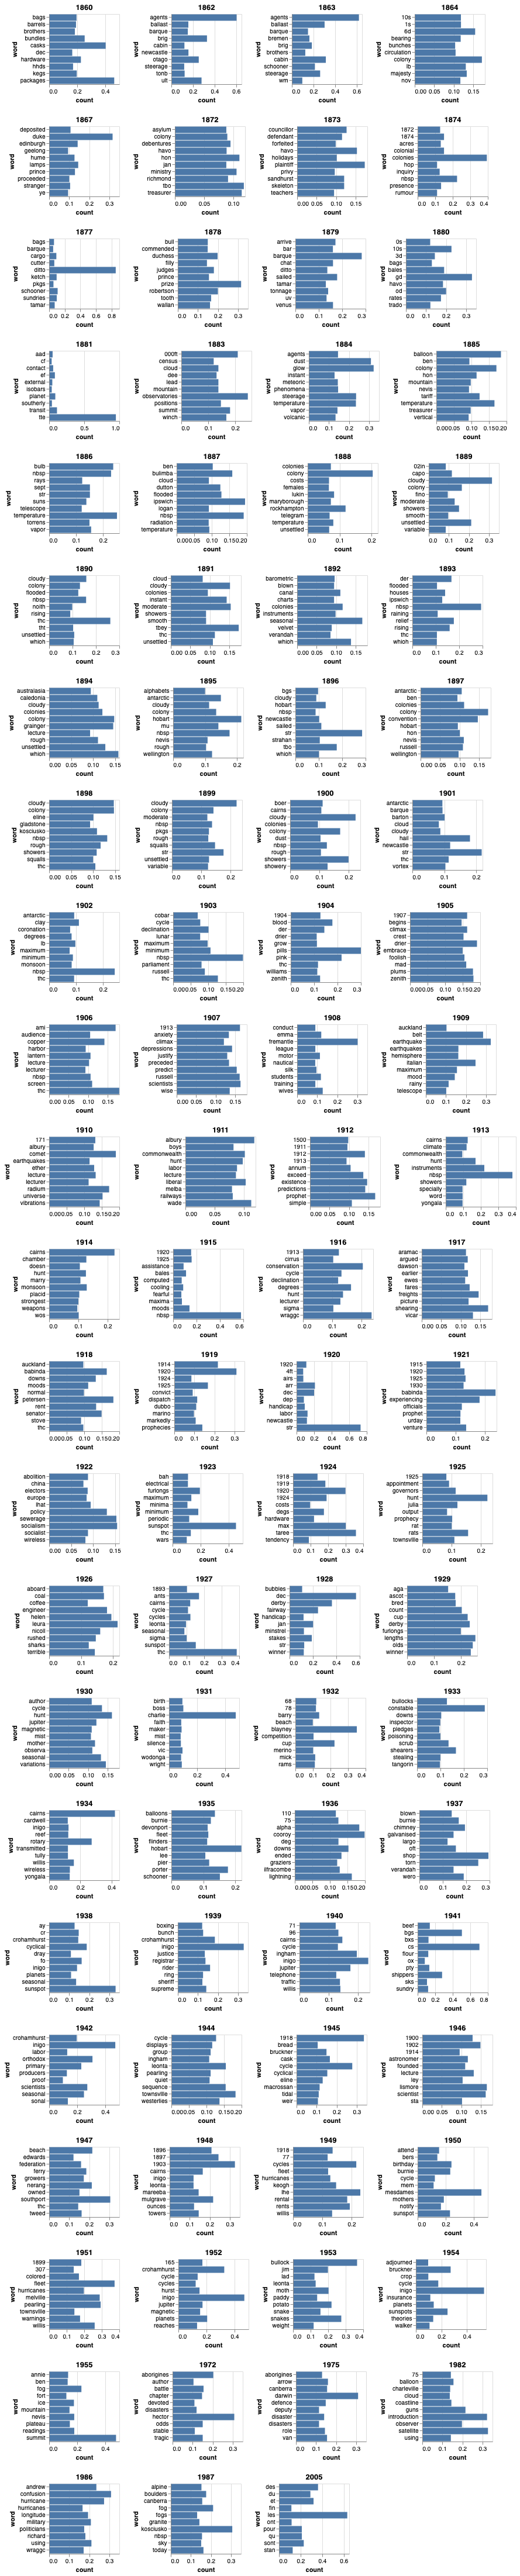

In [10]:
compound_chart = alt.vconcat()
years = get_years(harvest)
# Number of columns
cols = 4
start = 0
while start < len(years):
    row = alt.hconcat()
    for year in years[start:start+cols]:
        df_year_word_count = pd.DataFrame([{'word': w, 'count': df_tfidf_years.loc[year][w]} for w in df_years_top.loc[year].tolist()])
        chart = alt.Chart(df_year_word_count).mark_bar().encode(
            y='word:N',
            x='count:Q',
        ).properties(width=120, height=120, title=str(year), columns=4)
        row |= chart
    compound_chart &= row
    start += cols
compound_chart

## Visualise word TF-IDF values over time

In [11]:
def words_by_year(df, words):
    df_words = pd.DataFrame()
    for word in words:
        try:
            df_word = df_tfidf_years.T.loc[word].to_frame().reset_index().rename({'index':'year', word: 'count'}, axis=1)
        except KeyError:
            print(f"'{word}' not found")
        else:
            df_word['word'] = word
            df_words = df_words.append(df_word, ignore_index=True, sort=True)
    return df_words

In [12]:
df_words = words_by_year(df_tfidf_years, ['planets', 'islands', 'prediction', 'drought'])

'drought' not found


### Create a faceted chart

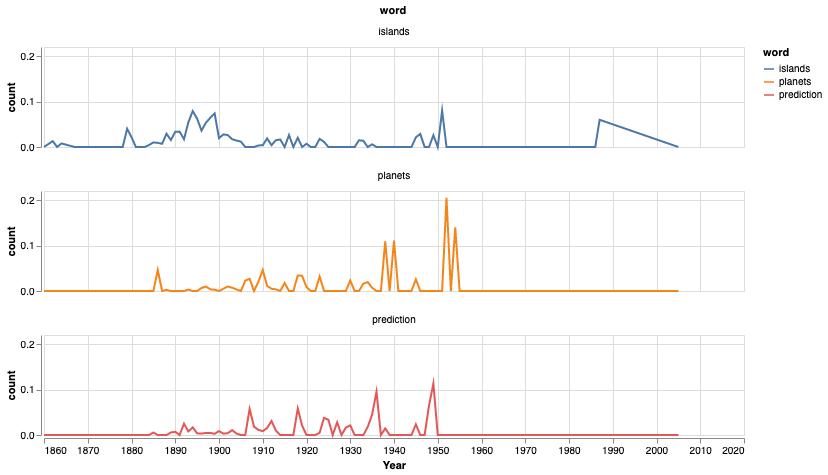

In [13]:
alt.Chart(df_words.loc[df_words['year'] > 0]).mark_line().encode(
    x=alt.X('year:Q', axis=alt.Axis(format='c', title='Year')),
    y='count:Q',
    color='word:N',
    facet='word:N'
).properties(width=700, height=100, columns=1)

### Create a bubbleline chart

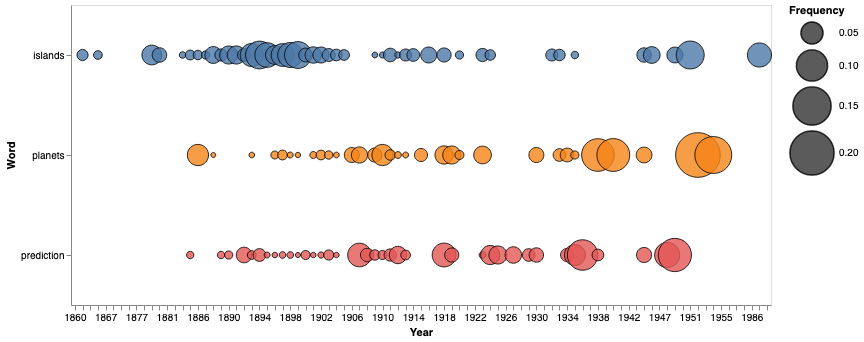

In [14]:
# Create a chart
alt.Chart(df_words.loc[df_words['year'] > 0]).mark_circle(
    
    # Style the circles
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    
    # Year on the X axis
    x=alt.X('year:O', axis=alt.Axis(format='c', title='Year', labelAngle=0)),
    
    # Object type on the Y axis
    y=alt.Y('word:N', title='Word'),
    
    # Size of the circles represents the number of objects
    size=alt.Size('count:Q',
        scale=alt.Scale(range=[0, 2000]),
        legend=alt.Legend(title='Frequency')
    ),
    
    # Color the circles by object type
    color=alt.Color('word:N', legend=None),
    
    # More details on hover
    tooltip=[alt.Tooltip('word:N', title='Word'), alt.Tooltip('year:O', title='Year'), alt.Tooltip('count:Q', title='Frequency', format=',')]
).properties(
    width=700,
    height=300
)

## Visualise word frequences by newspaper

The file titles also include the id of the newspaper they were published in. For example, `18601224-13-5696044` was published in the newspaper with the id of `13`, which happenes to be *The Argus*.